# Final project

## The topic

- In this study my goal is to predict the default behavior of credit card customers based on customers' demographic features and their history of credit card activities. 

- This topic is worth studying because it provides insights on what kind of customers are more likely to not pay their credit card bills on time. This could help bank managers select better customers.

## Reference

- Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
- https://github.com/irenebenedetto/default-of-credit-card-clients.
- I will cite more Ecomonic / Business papers.

## The data

- Credit card default data: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**Attribute information**: 

- This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
conda install xlrd

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

In [112]:
df = pd.read_excel("../data/default of credit card clients.xls", skiprows=1)
pd.set_option('display.max_columns', None)
df = df.rename({"PAY_0":"PAY_1"}, axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Exploratory Data Analysis

### Shape of data

In [7]:
df.shape

(30000, 25)

### Data types of features

In [113]:
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [114]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [139]:
cont_var = ["AGE", "LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
cate_var = ["SEX", "EDUCATION", "MARRIAGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default payment next month"]
target_var = "default payment next month"

- Value count for all categorical variables (including the target variable):

In [116]:
for var in cate_var:
    print(df[var].value_counts(),"\n")

2    18112
1    11888
Name: SEX, dtype: int64 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64 

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64 

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PA

### Plots

- 1. Bar plots for all categorical variables (including the target variable):

In [140]:
for var in cate_var:
    pd.value_counts(df[var]).plot.bar()
    plt.suptitle(f'Bar plot of {var}')
    plt.ylabel("Frequency")
    plt.xlabel(f'{var}')
    plt.xticks(rotation=0)
    plt.savefig(f'../figures/bar_{var}.jpg',dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

- 2. Histograms for all continuous variables:

In [118]:
var = "AGE"
var_ = df[var]
var_.plot.hist(bins = 100)
plt.suptitle(f'Histogram of {var}')
plt.savefig(f'../figures/hist_{var}.jpg',dpi = 300)
plt.clf()

<Figure size 432x288 with 0 Axes>

In [119]:
for var in cont_var[1:]:
    if df[var].min() == 0:
        var_ = df[var] + 1
    else:
        var_ = df[var]
    var_.plot.hist(bins = 100)
    plt.xscale("log")
    plt.suptitle(f'Histogram of {var}')
    plt.savefig(f'../figures/hist_{var}.jpg',dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

- 3. Stacked bar plots for the target variable by all categorical features:

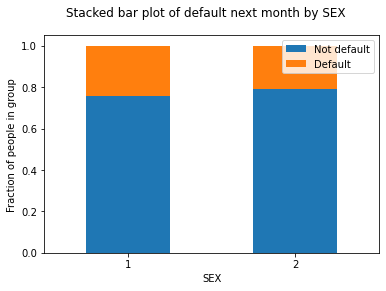

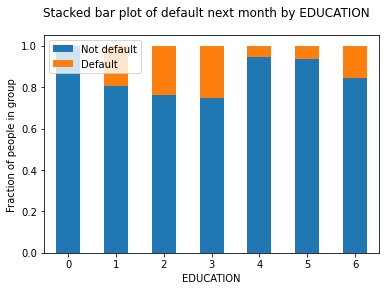

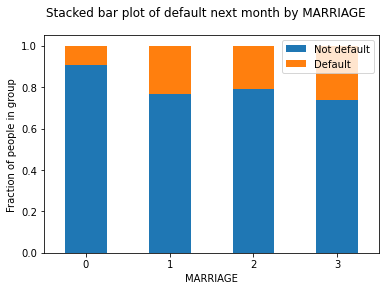

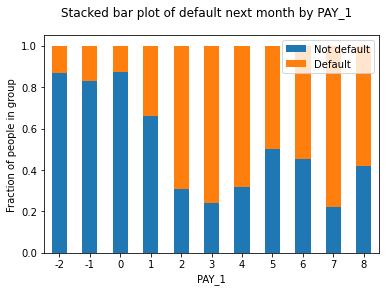

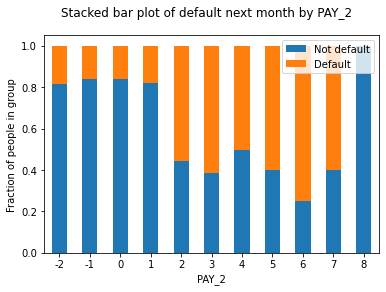

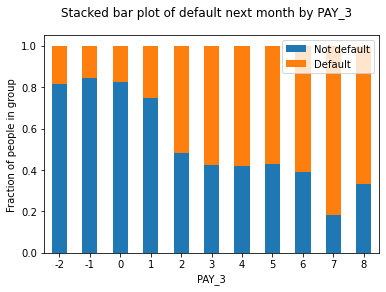

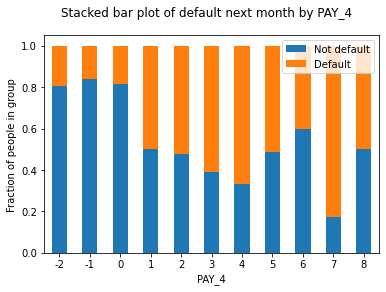

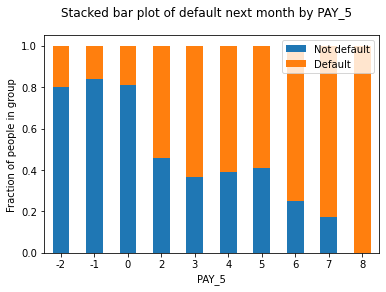

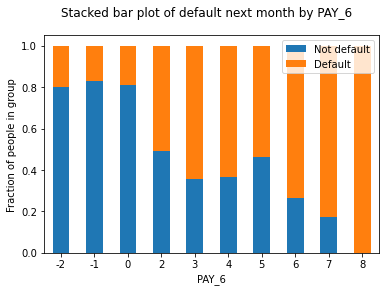

In [206]:
for var in cate_var[0:-1]:
    count_matrix = df.groupby([var, target_var]).size().unstack()
    #print(count_matrix)

    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    #print(count_matrix_norm)
    
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.suptitle(f'Stacked bar plot of default next month by {var}')
    plt.ylabel("Fraction of people in group")
    plt.legend(loc="lower left")
    plt.gca().legend(('Not default','Default'))
    plt.xticks(rotation=0)
    plt.show()
    
    plt.savefig(f'../figures/stackedbar_{var}.jpg',dpi = 300)

- 4. Category-specific histograms for all continuous features grouped by the target variable:

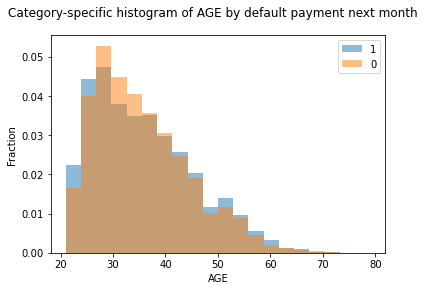

In [142]:
var = "AGE"

categories = df[target_var].unique()
bin_range = (df[var].min(),df[var].max())

for c in categories:
    plt.hist(df[df[target_var]==c][var],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    
plt.legend()
plt.suptitle(f'Category-specific histogram of {var} by {target_var}')
plt.ylabel("Fraction")
plt.xlabel(var)
plt.show()
plt.savefig(f'../figures/catspehist_{var}.jpg',dpi = 300)

In [143]:
for var in cont_var[1:]:
    categories = df[target_var].unique()
    bin_range = (df[var].min(),df[var].max())

    for c in categories:
        plt.hist(df[df[target_var]==c][var],alpha=0.5,label=c,range=bin_range,bins=20,density=True)

    plt.legend()
    plt.xscale("log")
    plt.suptitle(f'Category-specific histogram \n of {var} by {target_var}')
    plt.ylabel("Fraction")
    plt.xlabel(var)
    plt.savefig(f'../figures/catspehist_{var}.jpg',dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

- 5. Box plots for all continuous features grouped bt the target variable:

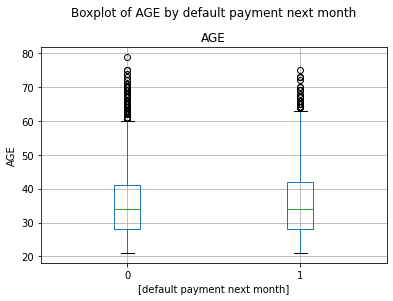

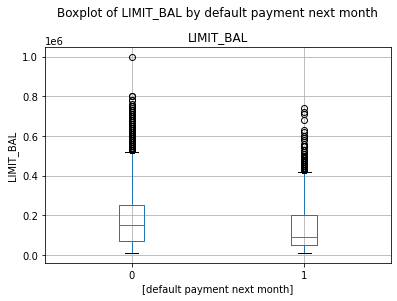

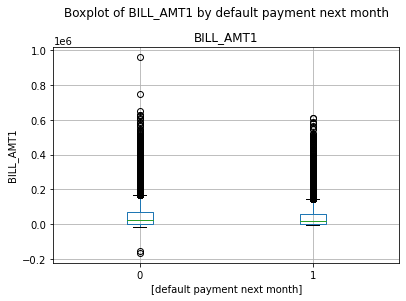

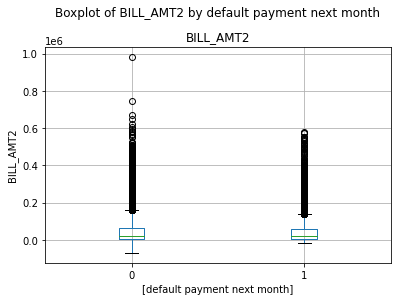

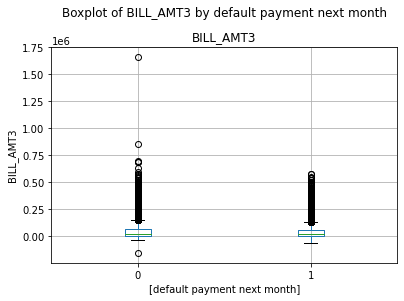

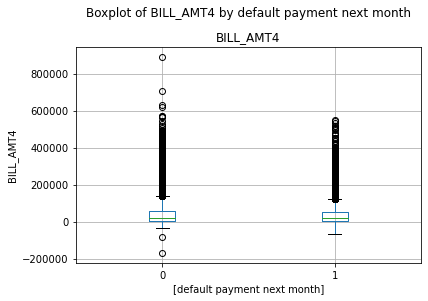

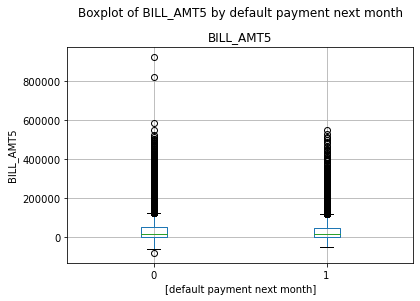

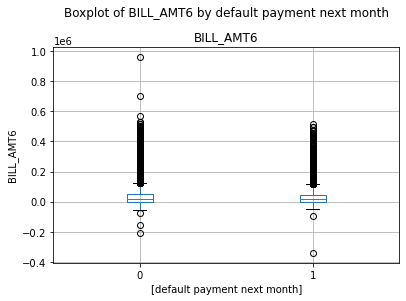

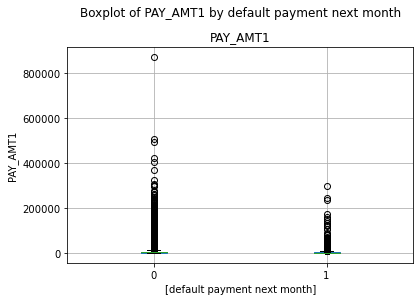

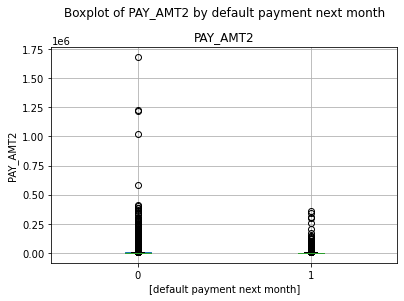

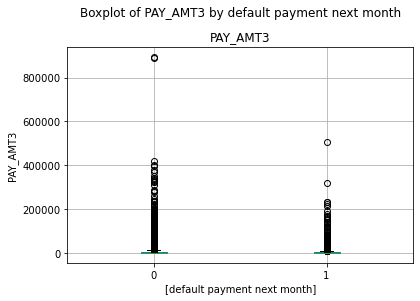

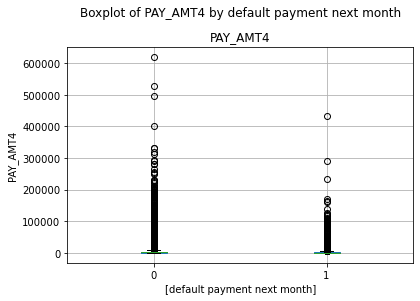

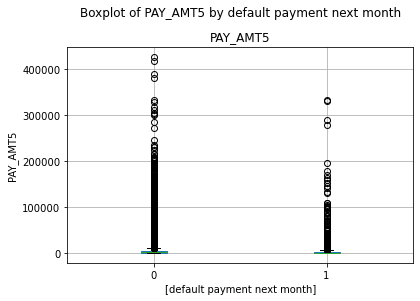

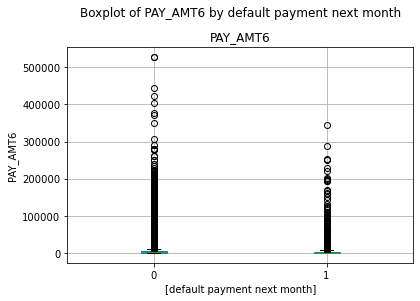

In [154]:
for var in cont_var:
    df[[var,target_var]].boxplot(by=target_var)
    plt.suptitle(f'Boxplot of {var} by {target_var}',y = 1.04)
    plt.ylabel(var)
    plt.savefig(f'../figures/boxplot_{var}.jpg',dpi = 300)

- 6. Violin plots for all continuous features grouped bt the target variable:

In [203]:
var = "AGE"

dataset = [df[df[target_var]==0][var].values,
            df[df[target_var]==1][var].values]
plt.violinplot(dataset = dataset)
plt.suptitle(f'Violin plot of {var} by default next month')
plt.xticks([1,2],[0,1])
plt.xlabel("default next month")
plt.ylabel(var)
plt.subplots_adjust(left=0.15)
plt.savefig(f'../figures/violinplot_{var}.jpg',dpi = 300)
plt.clf()

<Figure size 432x288 with 0 Axes>

In [204]:
sampling_perc = 0.98
q_low = (1-0.98)/2
q_high = 1 - (1-0.98)/2

for var in cont_var[1:]:
    df_ = df[(df[var] > df[var].quantile(q_low)) & (df[var] < df[var].quantile(q_high))]
    
    dataset = [df_[df_[target_var]==0][var].values,
               df_[df_[target_var]==1][var].values]
    plt.violinplot(dataset = dataset)
    plt.suptitle(f'Violin plot of {var} by default next month')
    plt.xticks([1,2],[0,1])
    plt.xlabel("default next month")
    plt.ylabel(var)
    plt.subplots_adjust(left=0.15)
    plt.savefig(f'../figures/violinplot_{var}.jpg',dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

- Scatter matrix:

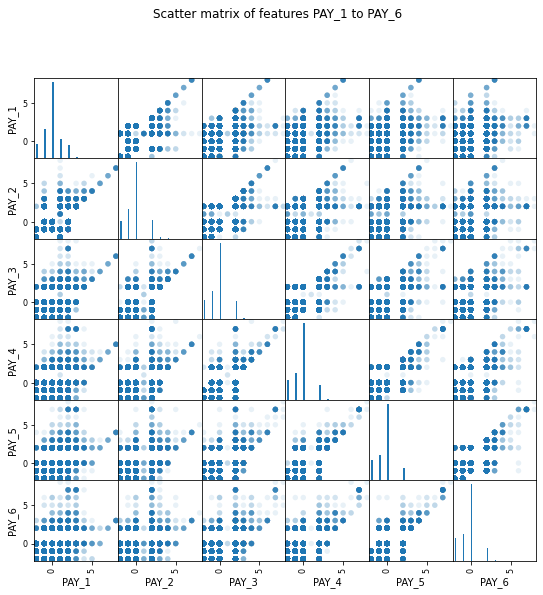

In [231]:
# 1. PAY_1 ~ PAY_6

pd.plotting.scatter_matrix(df[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()
plt.suptitle("Scatter matrix of features PAY_1 to PAY_6")
plt.subplots_adjust(top = 0.87)
plt.savefig(f'../figures/scattermatrix_PAY.jpg',dpi = 300)

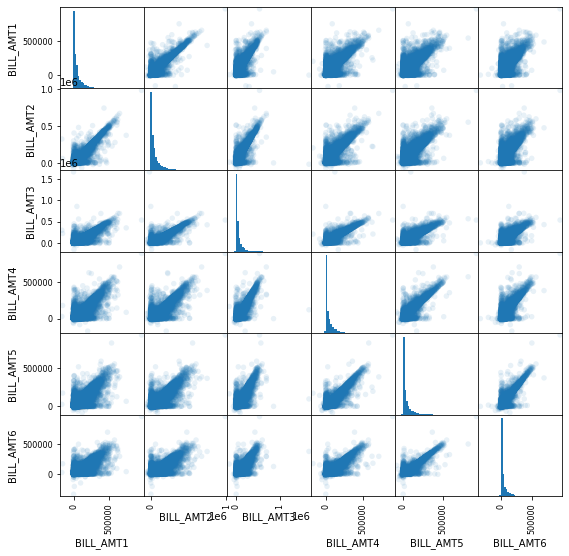

In [228]:
# 2. BILL_AMT1 ~ BILL_AMT6

pd.plotting.scatter_matrix(df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()
plt.savefig(f'../figures/scattermatrix_BILLAMT.jpg',dpi = 300)

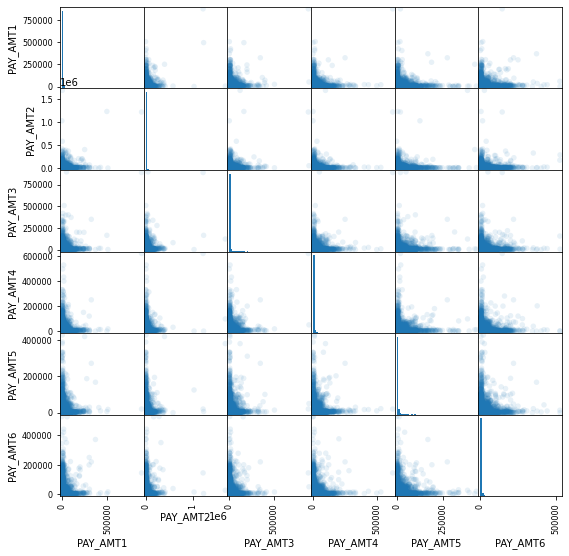

In [229]:
# 3. PAY_AMT1 ~ PAY_AMT6

pd.plotting.scatter_matrix(df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()
plt.savefig(f'../figures/scattermatrix_PAYAMT.jpg',dpi = 300)

### Figures used in midterm reports

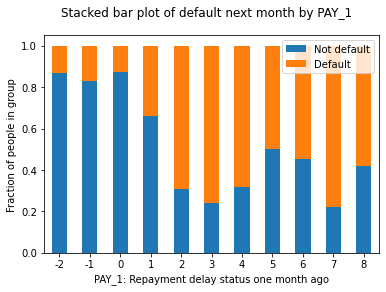

In [207]:
var = "PAY_1"

count_matrix = df.groupby([var, target_var]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    
count_matrix_norm.plot(kind='bar', stacked=True)
plt.suptitle(f'Stacked bar plot of default next month by {var}')
plt.ylabel("Fraction of people in group")
plt.legend(loc="lower left")
plt.gca().legend(('Not default','Default'))
plt.xlabel("PAY_1: Repayment delay status one month ago")
plt.xticks(rotation=0)
plt.show()
    
plt.savefig(f'../figures/stackedbar_{var}.jpg',dpi = 300)

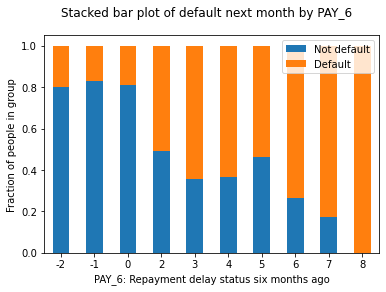

In [209]:
var = "PAY_6"

count_matrix = df.groupby([var, target_var]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    
count_matrix_norm.plot(kind='bar', stacked=True)
plt.suptitle(f'Stacked bar plot of default next month by {var}')
plt.ylabel("Fraction of people in group")
plt.legend(loc="lower left")
plt.gca().legend(('Not default','Default'))
plt.xlabel("PAY_6: Repayment delay status six months ago")
plt.xticks(rotation=0)
plt.show()
    
plt.savefig(f'../figures/stackedbar_{var}.jpg',dpi = 300)

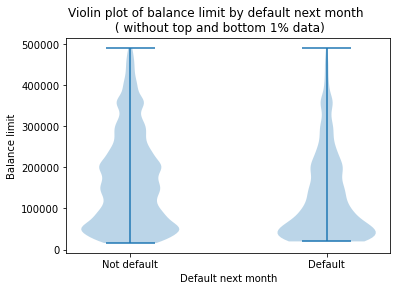

In [226]:
sampling_perc = 0.98
q_low = (1-0.98)/2
q_high = 1 - (1-0.98)/2

var = "LIMIT_BAL"

df_ = df[(df[var] > df[var].quantile(q_low)) & (df[var] < df[var].quantile(q_high))]
    
dataset = [df_[df_[target_var]==0][var].values,
            df_[df_[target_var]==1][var].values]
plt.violinplot(dataset = dataset)
plt.suptitle("Violin plot of balance limit by default next month \n ( without top and bottom 1% data)")
plt.xticks([1,2],["Not default","Default"])
plt.xlabel("Default next month")
plt.ylabel("Balance limit")
plt.subplots_adjust(left=0.15,top = 0.87)
plt.savefig(f'../figures/violinplot_{var}.jpg',dpi = 300)

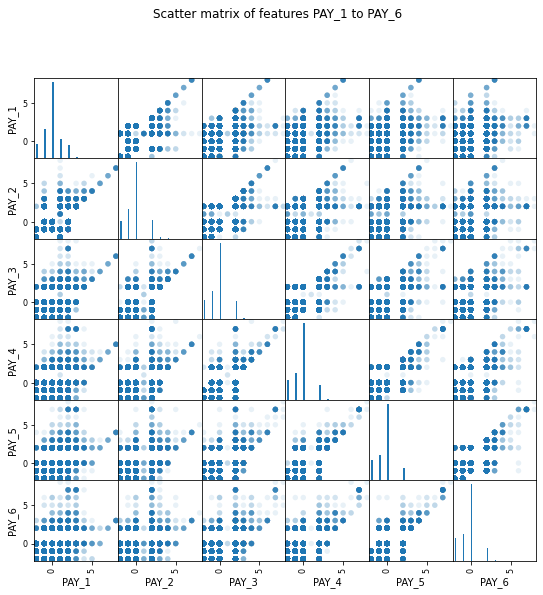

In [232]:
pd.plotting.scatter_matrix(df[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()
plt.suptitle("Scatter matrix of features PAY_1 to PAY_6")
plt.subplots_adjust(top = 0.87)
plt.savefig(f'../figures/scattermatrix_PAY.jpg',dpi = 300)

## Data preprocessing

- Discuss how you split the dataset and why.
    - KFold - more models would be trained.
    - 60% train, 20% validation, 20% test.
- Is your dataset IID?
    - Yes.
- Does it have group structure?
    - No.
- Is it a time-series data?
    - No.
- How should you split the dataset given your ML question to best mimic future use when you deploy the model?
- Apply MinMaxEncoder or StandardScaler on the continuous features
- Apply OneHotEncoder or OrdinalEncoder on categorical features
- Describe why you chose a particular preprocessor for each feature.
- How many features do you have in the preprocessed data?

In [196]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

y = df[target_var]
X = df.loc[:, df.columns != target_var]

random_state = 17

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('test set:',X_test.shape,y_test.shape)

kf = KFold(n_splits=4,shuffle=True,random_state=random_state)

ordinal_cat1 = ["0","1","2","3","4","5","6"]
ordinal_cat2 = ["-2","-1","0","1","2","3","4","5","6","7","8"]

ordinal_ftrs = ["EDUCATION","PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"] 
ordinal_cats = [ordinal_cat1, ordinal_cat2, ordinal_cat2, ordinal_cat2, ordinal_cat2, ordinal_cat2, ordinal_cat2]
onehot_ftrs = ["SEX","MARRIAGE"]
minmax_ftrs = ["AGE"]
std_ftrs = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", \
            "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

for train_index, val_index in kf.split(X_other,y_other):
    
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print("\n")
    print('training set:',X_train.shape, y_train.shape) 
    print('validation set:',X_val.shape, y_val.shape) 
    
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("X_train_prep:", X_train_prep.shape)
    print("X_val_prep:", X_val_prep.shape)
    print("X_test_prep:", X_test_prep.shape)

test set: (6000, 24) (6000,)


training set: (18000, 24) (18000,)
validation set: (6000, 24) (6000,)
X_train_prep: (18000, 27)
X_val_prep: (6000, 27)
X_test_prep: (6000, 27)


training set: (18000, 24) (18000,)
validation set: (6000, 24) (6000,)
X_train_prep: (18000, 27)
X_val_prep: (6000, 27)
X_test_prep: (6000, 27)


training set: (18000, 24) (18000,)
validation set: (6000, 24) (6000,)
X_train_prep: (18000, 27)
X_val_prep: (6000, 27)
X_test_prep: (6000, 27)


training set: (18000, 24) (18000,)
validation set: (6000, 24) (6000,)
X_train_prep: (18000, 27)
X_val_prep: (6000, 27)
X_test_prep: (6000, 27)
